In [19]:
import pandas as pd
import pyreadstat
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
import random
from sklearn.model_selection import cross_val_score
from sklearn import linear_model 
from sklearn.preprocessing import StandardScaler,FunctionTransformer
from sklearn.manifold import TSNE
warnings.filterwarnings('ignore') # to supress seaborn warnings
pd.options.display.max_columns = None # Remove pandas display column number limit
#InteractiveShell.ast_node_interactivity = "all" # Display all values of a jupyter notebook cell
import sys
from datetime import datetime
import time
from sklearn.metrics import cohen_kappa_score
from sklearn.svm import LinearSVC
from sklearn.metrics import (brier_score_loss, precision_score, recall_score,f1_score)
from sklearn.metrics import mean_absolute_error
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,mean_squared_error
#from sklearn.metrics import balanced_accuracy_score
#pandas library for reading data
import pandas as pd
#numpy library for computation with matrices and arrays
import numpy as np
#matplotlib library for visualization
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')
#command for displaying visualizations within the notebook
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import confusion_matrix, recall_score, precision_score,f1_score,log_loss
import seaborn as sns
from sklearn.model_selection import learning_curve, GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report,accuracy_score
from sklearn.linear_model import LogisticRegression
#from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn import preprocessing, metrics
#from xgboost import XGBClassifier
warnings.filterwarnings('ignore') # to supress warnings
from sklearn.model_selection import learning_curve, GridSearchCV
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import learning_curve, GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report,accuracy_score
from sklearn.linear_model import LogisticRegression
#from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn import preprocessing, metrics
from xgboost import XGBClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import StratifiedKFold
warnings.filterwarnings('ignore') # to supress warnings
import matplotlib.transforms as mtransforms
import matplotlib.lines as mlines
#Import libraries:
#from sklearn.preprocessing import Imputer
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.feature_selection import SelectKBest, f_classif

from scipy.stats import chi2_contingency

# Read data

In [20]:
df,meta=pyreadstat.read_sav("RMHS_General_Rescape_database_2018 1.sav", apply_value_formats=True, 
                            formats_as_category=True)
df.head()

,surveyid_1i1,Age_group_General,caracteristic,Age_group_rescap,surveyid_1i4,surveyid_1i5,surveyid_1i6,surveyid_1i8,enum_code,province,Residence_ID,district,sector,cell,village,estimate_wt,hh_rank,full_code,hh_code,full_code_1,hh_code_1,consent,survey_signature,surveyid_1i2_a,surveyid_1i2_b,surveyid_1i2_c,surveyid_1i2,surveyid_1i2_a_2,surveyid_1i2_b_2,surveyid_1i2_c_2,surveyid_1i2_1,surveyid_1i2a,surveyid_1i3,surveyid_1i7_1,survey_II,surveygroup1a1a,surveygroup1a1b,surveygroup1a2a,surveygroup1a2b,surveygroup1group_a1a3a1,surveygroup1group_a1a3b1,surveygroup1group_a1a3c1,surveygroup1group_a1a3d1,surveygroup1group_a1a3e1,surveygroup1group_a1a3f1,surveygroup1group_a1a3g1,surveygroup1group_a1a4a,surveygroup1group_a1a3a2,surveygroup1group_a1a3b2,surveygroup1group_a1a3c2,surveygroup1group_a1a3d2,surveygroup1group_a1a3e2,surveygroup1group_a1a3f2,surveygroup1group_a1a3g2,surveygroup1group_a1a3a3,surveygroup1group_a1a3b3,surveygroup1group_a1a3c3,surveygroup1group_a1a3d3,surveygroup1group_a1a3e3,surveygroup1group_a1a3f3,surveygroup1group_a1a3g3,surveygroup1group_a1a4_a,surveygroup1group_a1a4b,surveygroup1group_a1a5a,surveygroup1group_a1a5b,surveygroup1group_a1a6,surveygroup1group_a1a_a_b,survey_groupb_note_2,surveygroupbb1,surveygroupbb1a,surveygroupbb1b,surveygroupbb2,surveygroupbb3,surveygroupbb3a,surveygroupbb3b,surveygroupbb4,surveygroupbb4a,surveygroupbb4b,surveygroupbb5,surveygroupbb6,surveygroupbb7,surveygroupbb8,surveygroupbb9,surveygroupbb10,surveygroupbb10a,surveygroupbb10b,surveygroupbb11,surveygroupbb11a,surveygroupbb11b,surveygroupbb12,surveygroupbb12a,surveygroupbb12b,surveygroupbb12c,surveygroupbb12d,surveygroupbb13,surveygroupbb14,surveygroupbb14a,surveygroupbb14b,surveygroupbb14c,surveygroupbb15,surveygroupbb16,surveygroupbb16a,surveygroupbb16b,surveygroupbb16c,surveygroupbb16c_1,surveygroupbb17,surveygroupbb17a,surveygroupbb17b,surveygroupbb18,surveygroupbb_calc,summary_b,survey_groupc_note3,surveygroupcc0_1,surveygroupcc0_2,surveygroupcc0_2_7,surveygroupcc1a,surveygroupcc1b,surveygroupcc2a,surveygroupcc2b,surveygroupcc0_groupc3_1c3a_1_0,surveygroupcc0_groupc3_1c3a1,surveygroupcc0_groupc3_1c3b1,surveygroupcc0_groupc3_1c3c1,surveygroupcc0_groupc3_1c3d1,surveygroupcc0_groupc3_1c3e1,surveygroupcc0_groupc3_1c3f1,surveygroupcc0_groupc3_1c3g1,surveygroupcc0_groupc3_2c3a_2_0,surveygroupcc0_groupc3_2c3a2,surveygroupcc0_groupc3_2c3b2,surveygroupcc0_groupc3_2c3c2,surveygroupcc0_groupc3_2c3d2,surveygroupcc0_groupc3_2c3e2,surveygroupcc0_groupc3_2c3f2,surveygroupcc0_groupc3_2c3g2,surveygroupcc0_groupc3_3c3a_3_0,surveygroupcc0_groupc3_3c3a3,surveygroupcc0_groupc3_3c3b3,surveygroupcc0_groupc3_3c3c3,surveygroupcc0_groupc3_3c3d3,surveygroupcc0_groupc3_3c3e3,surveygroupcc0_groupc3_3c3f3,surveygroupcc0_groupc3_3c3g3,surveygroupcc0_groupc3_3_summary,surveygroupcc0_groupc3_1_summary,surveygroupcc0_groupc3_2_summary,surveygroupcc0_groupc3_summary,surveygroupcc0_groupc4,surveygroupcc0_groupc5,surveygroupcc0_groupc6,surveygroupcc0_groupc7,surveygroupcc0_groupc8a,surveygroupcc0_groupc8b,surveygroupcc0_groupc8c,survey_groupd_note5,surveygroupdd1a,surveygroupdd1b,surveygroupdd2,surveygroupdd3,surveygroupdd4_0d4,surveygroupdd4_0d4a,surveygroupdd4_0d4b,surveygroupdd4_0d4c,surveygroupdd4_0d4d,surveygroupdd4_0d4e,surveygroupdd4_0d4f,surveygroupdd4_0d4g,surveygroupdd4_0d4h,surveygroupdd4_0d4i,surveygroupdd4_0d4j,surveygroupdd4_0d4k,surveygroupdd4_0d4l,surveygroupdd4_0d4m,surveygroupdd4_0d6,surveygroupdd4_0d5,survey_note7,surveyf1,surveygroupff2,surveygroupff3,surveygroupff4,surveygroupff5,surveygroupff6,surveyf_summary,survey_groupg_note8,surveygroupgg1a,surveygroupgg1b,surveygroupgg2,surveygroupgg3a,surveygroupgg3b,surveygroupgg4,surveyg_summary,survey_grouph_note9,surveygrouphh1,surveygrouphh2,surveygrouphh_grouph4h4_0,surveygrouphh_grouph4h3a,surveygrouphh_grouph4h3b,surveygrouphh_grouph4h4a,surveygrouphh_grouph4h4b,surveygrouphh_grouph4h4c,surveygrouphh_grouph4h4d,surveygrouphh_grouph4h4e,surveygrouphh_grouph4h4f,surveygrouphh_grouph4h4g,surveygro

In [3]:
df.isna().sum()

surveyid_1i1             0
Age_group_General     1271
caracteristic         1401
Age_group_rescap     19110
surveyid_1i4             0
                     ...  
violence                 0
loss_dear                0
affiliation_group        0
alcol_drug               0
filter_$                 0
Length: 607, dtype: int64

In [4]:
df['surveygroupjj1b_1j1a_7'].value_counts()

surveygroupjj1b_1j1a_7
No     362
Yes      7
Name: count, dtype: int64

# EDA

# Extract youth data from whole dataset

In [5]:


# combine age from survival and general populations
df['age']=df['surveyid_1i2_a'].fillna(df['surveyid_1i2_a_2'])
df1 = df[(df['age']>14) & (df['age']<25)]

In [6]:
df1.columns

Index(['surveyid_1i1', 'Age_group_General', 'caracteristic',
       'Age_group_rescap', 'surveyid_1i4', 'surveyid_1i5', 'surveyid_1i6',
       'surveyid_1i7', 'surveyid_1i8', 'enumerator',
       ...
       'mdd_sychotic_feature', 'Q_EPILEPSY', 'bipolar_global',
       'final_any_mental_disoder', 'violence', 'loss_dear',
       'affiliation_group', 'alcol_drug', 'filter_$', 'age'],
      dtype='object', length=608)

# Extract the required variables

In [7]:
Needed_cols=['surveyid_1i1','surveyid_1i4','surveyid_1i5', 'surveyid_1i6','surveyid_1i7', 
              'age','surveyr1','surveys1','time_of_alcol','violence','experience_Trauma',
            'loss_dear', 'affiliation_group', 'alcol_drug','final_any_mental_disoder']

In [9]:
# for column in df.columns:
#     if column in meta.variable_value_labels:
#         df[column] = df[column].map(meta.variable_value_labels[column])

In [10]:
# combine age from survival and general populations
df['age']=df['surveyid_1i2_a'].fillna(df['surveyid_1i2_a_2'])
df1 = df[(df['age']>14) & (df['age']<25)]

In [11]:
data = df1[Needed_cols]

In [12]:
#Rename columns

In [13]:
data.columns=['Sex','education','marital status','employment','religion','age',
              'Mental health history','Medical condition experience','heavy drinking','violence experience',
              'trauma experience','lifetime loss','affiliation pro-social group',
              'family history mental illness','any mental disorder']

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5221 entries, 0 to 20380
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   Sex                            5221 non-null   category
 1   education                      5221 non-null   category
 2   marital status                 5221 non-null   category
 3   employment                     5221 non-null   category
 4   religion                       5221 non-null   category
 5   age                            5221 non-null   float64 
 6   Mental health history          5221 non-null   category
 7   Medical condition experience   5221 non-null   category
 8   heavy drinking                 5221 non-null   category
 9   violence experience            5221 non-null   category
 10  trauma experience              5221 non-null   category
 11  lifetime loss                  5221 non-null   category
 12  affiliation pro-social group   5221 no

In [15]:
data.head()

,Sex,education,marital status,employment,religion,age,Mental health history,Medical condition experience,heavy drinking,violence experience,trauma experience,lifetime loss,affiliation pro-social group,family history mental illness,any mental disorder
0,Male,Primary school,Never married,Salaried employee,Christian,24.0,No,No,No,No,No,No,No,No,No
7,Male,Secondary/TVET,Never married,Under age of laborforce,Christian,20.0,No,No,No,No,No,No,Yes,No,No
14,Male,Secondary/TVET,Never married,Under age of laborforce,Christian,21.0,No,No,No,No,No,No,Yes,Yes,No
15,Female,Primary school,Never married,Under age of laborforce,Christian,19.0,No,No,No,No,No,Yes,No,Yes,Yes
18,Male,Primary school,Never married,Under age of laborforce,Christian,15.0,No,No,No,No,No,No,No,No,No


In [16]:
#data.describe(include='object').T


In [17]:
data.columns

Index(['Sex', 'education', 'marital status', 'employment', 'religion', 'age',
       'Mental health history', 'Medical condition experience',
       'heavy drinking', 'violence experience', 'trauma experience',
       'lifetime loss', 'affiliation pro-social group',
       'family history mental illness', 'any mental disorder'],
      dtype='object')

In [18]:
data.isnull().sum()

Sex                              0
education                        0
marital status                   0
employment                       0
religion                         0
age                              0
Mental health history            0
Medical condition experience     0
heavy drinking                   0
violence experience              0
trauma experience                0
lifetime loss                    0
affiliation pro-social group     0
family history mental illness    0
any mental disorder              0
dtype: int64

In [19]:
# summarize the number of rows with missing values for each column
total_missing_data = data.isnull().sum().sort_values(ascending=False)
percent_of_missing_data = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending=False)
missing_data = pd.concat(
    [
        total_missing_data,
        percent_of_missing_data#
    ],
    axis=1,
    keys=['Total', 'Percent']
)
print(missing_data.head(30))

                               Total  Percent
Sex                                0      0.0
education                          0      0.0
marital status                     0      0.0
employment                         0      0.0
religion                           0      0.0
age                                0      0.0
Mental health history              0      0.0
Medical condition experience       0      0.0
heavy drinking                     0      0.0
violence experience                0      0.0
trauma experience                  0      0.0
lifetime loss                      0      0.0
affiliation pro-social group       0      0.0
family history mental illness      0      0.0
any mental disorder                0      0.0


In [ ]:
## Data preprocessing

In [20]:

data['education'] = data['education'].replace('Illiterate, and primary not completed', 'No education')
data['education'] = data['education'].replace(['Secondary/TVET','University'], 'Secondary/higher')
data['education'] = data['education'].replace('Primary school', 'Primary')

In [21]:
data['employment'] = data['employment'].replace('Under age of laborforce', 'Unemployed')
data['employment'] = data['employment'].replace(['Self-employed','Salaried employee'], 'Employed')


In [22]:
data['marital status'].value_counts()

marital status
Never married                    4343
Living together as if married     600
Married                           244
Divorced/Separated                 28
Widowed                             6
Name: count, dtype: int64

In [23]:
data['marital status'] = data['marital status'].replace(['Divorced/Separated','Widowed'], 'Separated')
data['marital status'] = data['marital status'].replace(['Married','Living together as if married'], 'Married')


In [24]:
data['marital status'].value_counts()

marital status
Never married    4343
Married           844
Separated          34
Name: count, dtype: int64

In [25]:
data['religion']=data['religion'].replace(['Other','None'],'Other/None')

In [26]:
data['age_group'] = data['age'].apply(lambda x: 1 if x <=18 else 2)
classification_labels = {1: 'Adolescent', 2: 'young adults'}
data['age_group']= data['age_group'].map(classification_labels)
data['age_group']

0        young adults
7        young adults
14       young adults
15       young adults
18         Adolescent
             ...     
20367    young adults
20368      Adolescent
20369      Adolescent
20371    young adults
20380    young adults
Name: age_group, Length: 5221, dtype: object

In [28]:
data.columns

Index(['Sex', 'education', 'marital status', 'employment', 'religion', 'age',
       'Mental health history', 'Medical condition experience',
       'heavy drinking', 'violence experience', 'trauma experience',
       'lifetime loss', 'affiliation pro-social group',
       'family history mental illness', 'any mental disorder', 'age_group'],
      dtype='object')

In [29]:
data['lifetime loss'].value_counts()

lifetime loss
No     2971
Yes    2250
Name: count, dtype: int64

In [ ]:
## Data encoding

In [30]:
##Encoding categorical variables by using map function
data['Sex']=data.Sex.map({'Female': 0 , 'Male': 1})
data['education']=data.education.map({'No education': 0,'Primary': 1,'Secondary/higher':2})
data['marital status']=data['marital status'].map({'Never married': 0,'Married': 1, 'Separated':2})
data['employment']=data.employment.map({'Unemployed': 0,'Employed': 1})
data['religion']=data.religion.map({'Other/None':0, 'Muslim':1, 'Christian':2})
data['age_group']=data.age_group.map({'Adolescent':0,'young adults': 1})
data['Mental health history']=data['Mental health history'].map({'No': 0,'Yes': 1})
data['Medical condition experience']=data['Medical condition experience'].map({'No': 0,'Yes': 1})
data['heavy drinking']=data['heavy drinking'].map({'No': 0,'Yes': 1})
data['violence experience']=data['violence experience'].map({'No': 0,'Yes': 1})
data['trauma experience']=data['trauma experience'].map({'No': 0,'Yes': 1})
data['lifetime loss']=data['lifetime loss'].map({'No': 0,'Yes': 1})
data['affiliation pro-social group']=data['affiliation pro-social group'].map({'No': 0,'Yes': 1})
data['family history mental illness']=data['family history mental illness'].map({'No': 0,'Yes': 1})
data['any mental disorder']=data['any mental disorder'].map({'No': 0,'Yes': 1})


In [33]:
data.columns

Index(['Sex', 'education', 'marital status', 'employment', 'religion', 'age',
       'Mental health history', 'Medical condition experience',
       'heavy drinking', 'violence experience', 'trauma experience',
       'lifetime loss', 'affiliation pro-social group',
       'family history mental illness', 'any mental disorder', 'age_group'],
      dtype='object')

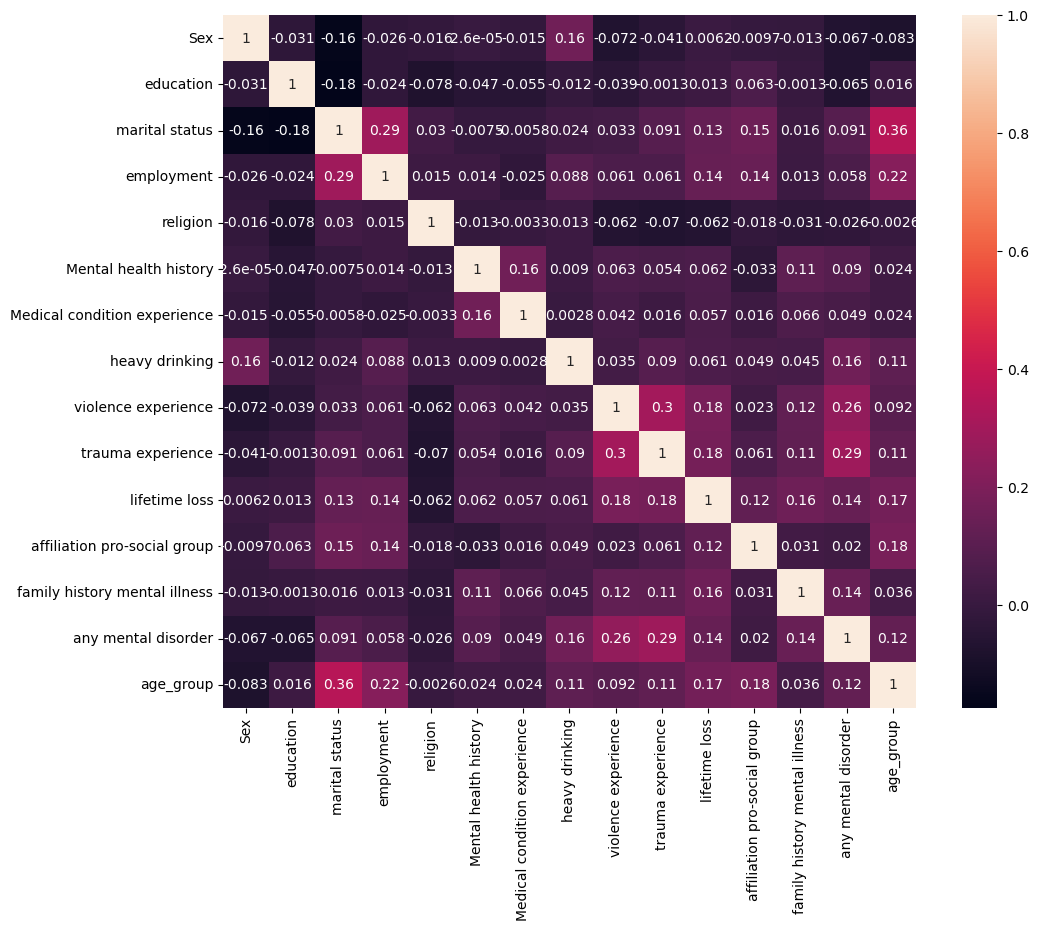

In [34]:
#correlation matrix
corrmat = data.drop('age', axis=1).corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=1, square=True, annot=True);
plt.savefig('correlation.png', bbox_inches='tight')
plt.show()
#plt.close(fig) 
     

In [36]:
#Encoding data
labelDict = {}
for feature in data:
    le = preprocessing.LabelEncoder()
    le.fit(data[feature])
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    data[feature] = le.transform(data[feature])
    # Get labels
    labelKey = 'label_' + feature
    labelValue = [*le_name_mapping]
    labelDict[labelKey] =labelValue
    
for key, value in labelDict.items():     
    print(key, value)

label_Sex [0, 1]
label_education [0, 1, 2]
label_marital status [0, 1, 2]
label_employment [0, 1]
label_religion [0, 1, 2]
label_age [15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0]
label_Mental health history [0, 1]
label_Medical condition experience [0, 1]
label_heavy drinking [0, 1]
label_violence experience [0, 1]
label_trauma experience [0, 1]
label_lifetime loss [0, 1]
label_affiliation pro-social group [0, 1]
label_family history mental illness [0, 1]
label_any mental disorder [0, 1]
label_age_group [0, 1]


In [37]:
### Creating dummies variables
col=[ 'Sex', 'marital status','employment',
     'education','religion','affiliation pro-social group',
       'Mental health history', 'Medical condition experience',
       'heavy drinking', 'violence experience', 'trauma experience',
       'lifetime loss',
       'family history mental illness', 'age_group']
new_df= pd.get_dummies(data, columns=col, prefix=col)
new_df.head()


,age,any mental disorder,Sex_0,Sex_1,marital status_0,marital status_1,marital status_2,employment_0,employment_1,education_0,education_1,education_2,religion_0,religion_1,religion_2,affiliation pro-social group_0,affiliation pro-social group_1,Mental health history_0,Mental health history_1,Medical condition experience_0,Medical condition experience_1,heavy drinking_0,heavy drinking_1,violence experience_0,violence experience_1,trauma experience_0,trauma experience_1,lifetime loss_0,lifetime loss_1,family history mental illness_0,family history mental illness_1,age_group_0,age_group_1
0,9,0,False,True,True,False,False,False,True,False,True,False,False,False,True,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,False,True
7,5,0,False,True,True,False,False,True,False,False,False,True,False,False,True,False,True,True,False,True,False,True,False,True,False,True,False,True,False,True,False,False,True
14,6,0,False,True,True,False,False,True,False,False,False,True,False,False,True,False,True,True,False,True,False,True,False,True,False,True,False,True,False,False,True,False,True
15,4,1,True,False,True,False,False,True,False,False,True,False,False,False,True,True,False,True,False,True,False,True,False,True,False,True,False,False,True,False,True,False,True
18,0,0,False,True,True,False,False,True,False,False,True,False,False,False,True,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False


## Split data into Stratified K-fold

In [38]:
#x=data[['trauma experience', 'violence experience', 'age', 'family history mental illness', 'lifetime loss', 'drug u]
x=new_df.drop(['age','any mental disorder'], axis=1)
y=new_df['any mental disorder']

In [39]:

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.15,random_state=42)

train_ratio = 0.7
validation_ratio = 0.15
test_ratio = 0.15
kfold = 5
seed=1234
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.15)
StratifiedKFold(n_splits=kfold)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio)) 


In [40]:
#train_ratio = 0.7
validation_ratio = 0.15
test_ratio = 0.15
kfold = 10
seed=1234
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.15)
StratifiedKFold(n_splits=kfold)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio)) 


In [41]:
x_train.columns

Index(['Sex_0', 'Sex_1', 'marital status_0', 'marital status_1',
       'marital status_2', 'employment_0', 'employment_1', 'education_0',
       'education_1', 'education_2', 'religion_0', 'religion_1', 'religion_2',
       'affiliation pro-social group_0', 'affiliation pro-social group_1',
       'Mental health history_0', 'Mental health history_1',
       'Medical condition experience_0', 'Medical condition experience_1',
       'heavy drinking_0', 'heavy drinking_1', 'violence experience_0',
       'violence experience_1', 'trauma experience_0', 'trauma experience_1',
       'lifetime loss_0', 'lifetime loss_1', 'family history mental illness_0',
       'family history mental illness_1', 'age_group_0', 'age_group_1'],
      dtype='object')

## Model1: Logistic regression

train_accuracy: 86.45
test_accuracy: 88.01


<Figure size 1500x1200 with 0 Axes>

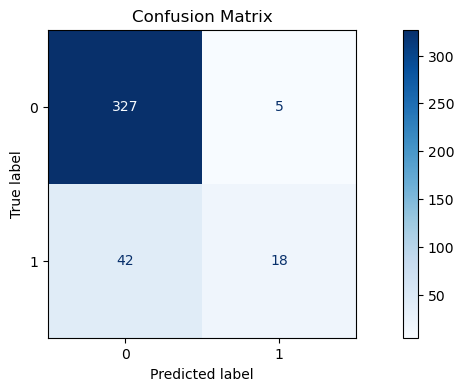

In [42]:
# fit the model by Logistic regression
log = LogisticRegression()

log.fit(x_train, y_train)
# evaluate the model
yhat = log.predict(x_test)
y_pred=log.predict(x_train)
# evaluate predictions
test_accuracy = accuracy_score(y_test, yhat)
train_accuracy = accuracy_score(y_train,y_pred)

#Evaluate performance of model

print('train_accuracy: %.2f' % (train_accuracy *100))
print('test_accuracy: %.2f' % (test_accuracy *100))

# Calculate the confusion matrix
conf_matrix_lg = confusion_matrix(y_test, yhat)

# Create a ConfusionMatrixDisplay object
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_lg)

# Plot the confusion matrix
plt.figure(figsize=(15,12))
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.savefig('Confusion_matrix_logistic.png' )
plt.show()


## Model2: Random forest

train_accuracy: 91.73
test_accuracy: 88.52


<Figure size 1500x1200 with 0 Axes>

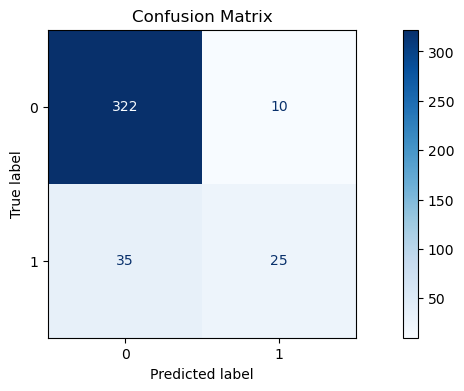

In [43]:
#fit the model using Random forestclassifier
rf = RandomForestClassifier(n_estimators=200)

rf.fit(x_train, y_train)
# make predictions using random forest classifier
yhat_rf = rf.predict(x_test)
y_pred_rf=rf.predict(x_train)

# evaluate predictions
test_accuracy_rf = accuracy_score(y_test, yhat_rf)
train_accuracy_rf = accuracy_score(y_train,y_pred_rf)

#Evaluate performance of model

print('train_accuracy: %.2f' % (train_accuracy_rf *100))
print('test_accuracy: %.2f' % (test_accuracy_rf *100))

# Calculate the confusion matrix
conf_matrix_rf = confusion_matrix(y_test, yhat_rf)

# Plot the confusion matrix
plt.figure(figsize=(15,12))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_rf)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.savefig('Confusion_matrix_rforest.png' )
plt.show()

## Model 3: Support vector machine

train_accuracy: 87.40
test_accuracy: 86.99


<Figure size 1500x1200 with 0 Axes>

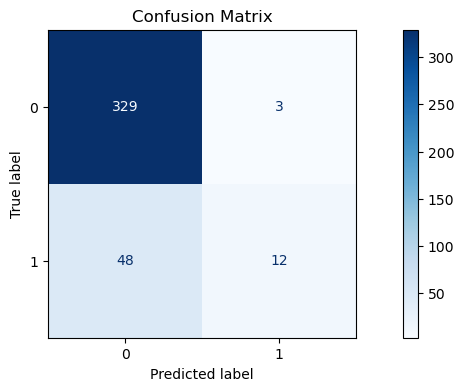

In [44]:
#fit the model using svclassifier
svm= SVC()
#C=5,gamma=0.03
#'C': 10, 'gamma': 'scale', 'kernel': 'poly'
svm.fit(x_train, y_train)
# make predictions using random forest classifier
yhat_svm = svm.predict(x_test)
y_pred_svm=svm.predict(x_train)

# evaluate predictions
test_accuracy_svm = accuracy_score(y_test, yhat_svm)
train_accuracy_svm = accuracy_score(y_train,y_pred_svm)

#Evaluate performance of model

print('train_accuracy: %.2f' % (train_accuracy_svm *100))
print('test_accuracy: %.2f' % (test_accuracy_svm *100))


# Calculate the confusion matrix
conf_matrix_sv = confusion_matrix(y_test, yhat_svm)

# Plot the confusion matrix
plt.figure(figsize=(15,12))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_sv)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.savefig('Confusion_matrix_svm.png' )
plt.show()





### Model 4: Gradient Boosting

train_accuracy: 88.24
test_accuracy: 87.24


<Figure size 1500x1200 with 0 Axes>

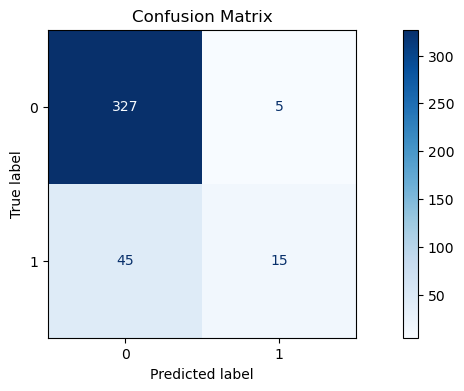

In [45]:
gb =  GradientBoostingClassifier()
gb.fit(x_train,y_train)
pred_gb=gb.predict(x_test)
y_pred_gb=gb.predict(x_train)

# evaluate predictions
test_accuracy_gb = accuracy_score(y_test, pred_gb)
train_accuracy_gb = accuracy_score(y_train,y_pred_gb)

#Evaluate performance of model

print('train_accuracy: %.2f' % (train_accuracy_gb *100))
print('test_accuracy: %.2f' % (test_accuracy_gb *100))

# Calculate the confusion matrix
conf_matrix_gb = confusion_matrix(y_test, pred_gb)

# Plot the confusion matrix
plt.figure(figsize=(15,12))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_gb)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.savefig('Confusion_matrix_gboosting.png' )
plt.show()

## parameter tuning with grid search

In [46]:
# Initialize models
svc = SVC()
log_reg = LogisticRegression(max_iter=1000)
gbc = GradientBoostingClassifier()
rf = RandomForestClassifier()

### GridSearchCV Example ###
# SVM Parameters for Grid Search
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': [0.01, 0.1, 1, 'scale', 'auto']
}

# Logistic Regression Parameters for Grid Search
param_grid_log = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs'],
    'penalty': ['l1', 'l2'],
    'class_weight': ['balanced', None]
}

# Gradient Boosting Parameters for Grid Search
param_grid_gbc = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
    'subsample': [0.8, 0.9, 1.0]
}

# Random Forest Parameters for Grid Search
param_grid_rf = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2, 3, 4, 5, 6],
    'min_samples_leaf': [1, 2, 3, 4]
}

print("\nGridSearchCV Tuning")

# SVM
grid_svm = GridSearchCV(svc, param_grid_svm, cv=5)
grid_svm.fit(x_train, y_train)
print("Best parameters for SVM (Grid):", grid_svm.best_params_)

# Logistic Regression
grid_log = GridSearchCV(log_reg, param_grid_log, cv=5)
grid_log.fit(x_train, y_train)
print("Best parameters for Logistic Regression (Grid):", grid_log.best_params_)

# Gradient Boosting
grid_gbc = GridSearchCV(gbc, param_grid_gbc, cv=5)
grid_gbc.fit(x_train, y_train)
print("Best parameters for Gradient Boosting (Grid):", grid_gbc.best_params_)

# Random Forest
grid_rf = GridSearchCV(rf, param_grid_rf, cv=5)
grid_rf.fit(x_train, y_train)
print("Best parameters for Random Forest (Grid):", grid_rf.best_params_)


GridSearchCV Tuning
Best parameters for SVM (Grid): {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
Best parameters for Logistic Regression (Grid): {'C': 0.1, 'class_weight': None, 'penalty': 'l2', 'solver': 'liblinear'}
Best parameters for Gradient Boosting (Grid): {'learning_rate': 0.01, 'max_depth': 8, 'n_estimators': 300, 'subsample': 0.8}
Best parameters for Random Forest (Grid): {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


## Model with parameter tunining

In [47]:
logistic = LogisticRegression(**grid_log.best_params_)
model1 = RandomForestClassifier(**grid_rf.best_params_)
model2= SVC(**grid_svm.best_params_)
model3 =  GradientBoostingClassifier(**grid_gbc.best_params_)

# ROC AUC

In [48]:

logistic.fit(x_train,y_train)
pred_lr1 = logistic.predict(x_test)
print(roc_auc_score(y_test,pred_lr1))
score=cross_val_score(logistic,
                        x_train,y_train, cv=10, scoring='roc_auc')
print('Score:',score)
print('AUC',score.mean(),'+',score.std())
#plot_confusion_matrix(confusion_matrix(y_test, y_pred))

0.6258032128514056
Score: [0.79569221 0.76984127 0.77636129 0.75253093 0.76792763 0.79015214
 0.74029605 0.75900167 0.68966165 0.7469716 ]
AUC 0.7588436439791243 + 0.028564583683599647


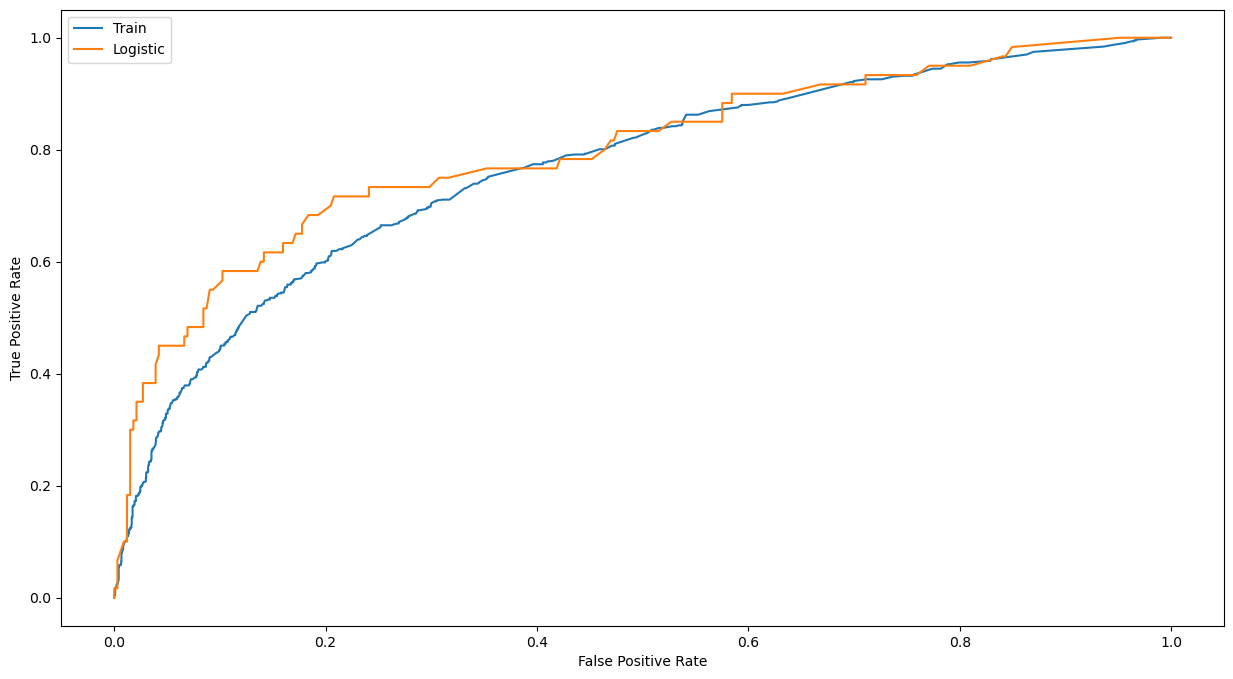

Area Under the Curve for logistic regression:  0.7971887550200804


In [49]:
probas_train_l = logistic.predict_proba(x_train)
fpr_t, tpr_t, thresholds_t = roc_curve(y_train, probas_train_l[:, 1])

# Testing Set
probas_l = logistic.predict_proba(x_test)
fpr_lg, tpr_lg, thresholds = roc_curve(y_test, probas_l[:, 1])
roc_auc_lg = auc(fpr_lg, tpr_lg)

plt.figure(figsize=(15,8))
train= plt.plot(fpr_t, tpr_t, label = 'Train')
test= plt.plot(fpr_lg, tpr_lg, label = 'Logistic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.savefig("AUC_Logistic.png")
plt.show()

print('Area Under the Curve for logistic regression: ', roc_auc_lg)

# Random forest

In [50]:
model1.fit(x_train,y_train)
y_pred_r = model1.predict(x_test)
print(roc_auc_score(y_test,y_pred_r))
score=cross_val_score(model1,
                        x_train,y_train, cv=10, scoring='roc_auc')
print('Score:',score)
print('AUC',score.mean(),'+',score.std())
#plot_confusion_matrix(confusion_matrix(y_test, y_pred))

0.6576305220883534
Score: [0.81152356 0.77600717 0.78906803 0.77711119 0.77948191 0.8045847
 0.76776316 0.75620301 0.74864244 0.76677109]
AUC 0.7777156264012778 + 0.018780527467044433


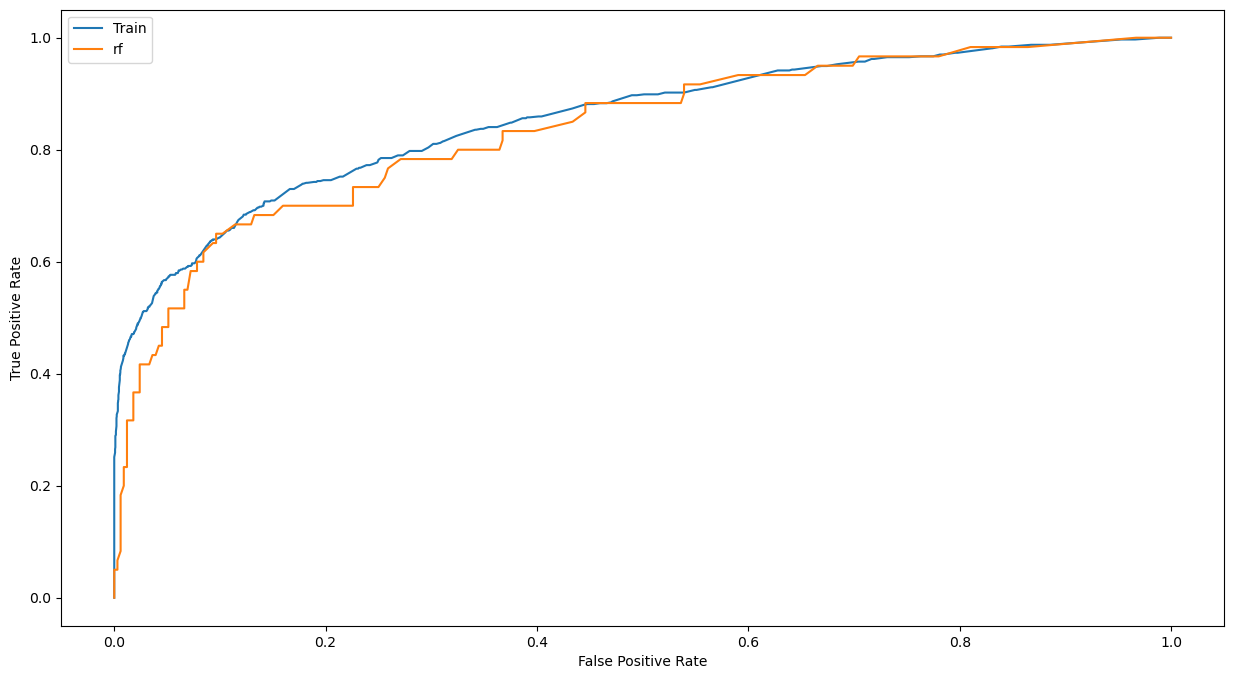

Area Under the Curve for Random forest:  0.8358935742971888


In [51]:
probas_train_r = model1.predict_proba(x_train)
fpr_t, tpr_t, thresholds_t = roc_curve(y_train, probas_train_r[:, 1])

# Testing Set
probas_r = model1.predict_proba(x_test)
fpr_rf, tpr_rf, thresholds = roc_curve(y_test, probas_r[:, 1])
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(15,8))
train, = plt.plot(fpr_t, tpr_t, label = 'Train')
test, = plt.plot(fpr_rf, tpr_rf, label = 'rf')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.savefig("AUC_Rforest.png")
plt.show()

print('Area Under the Curve for Random forest: ', roc_auc_rf)

###### SVM

In [53]:

model2.fit(x_train,y_train)
y_pred_s =model2.predict(x_test)
roc_auc_score(y_test,y_pred_s)
score=cross_val_score(SVC(),
                        x_train,y_train, cv=10, scoring='roc_auc')
print('Score:',score)
print('AUC',score.mean(),'+',score.std())
#plot_confusion_matrix(confusion_matrix(y_test, y_pred))

Score: [0.70595342 0.64473191 0.6413365  0.68520602 0.69490132 0.7135074
 0.66702303 0.63485798 0.65194236 0.70528404]
AUC 0.674474396755093 + 0.0284808316952525


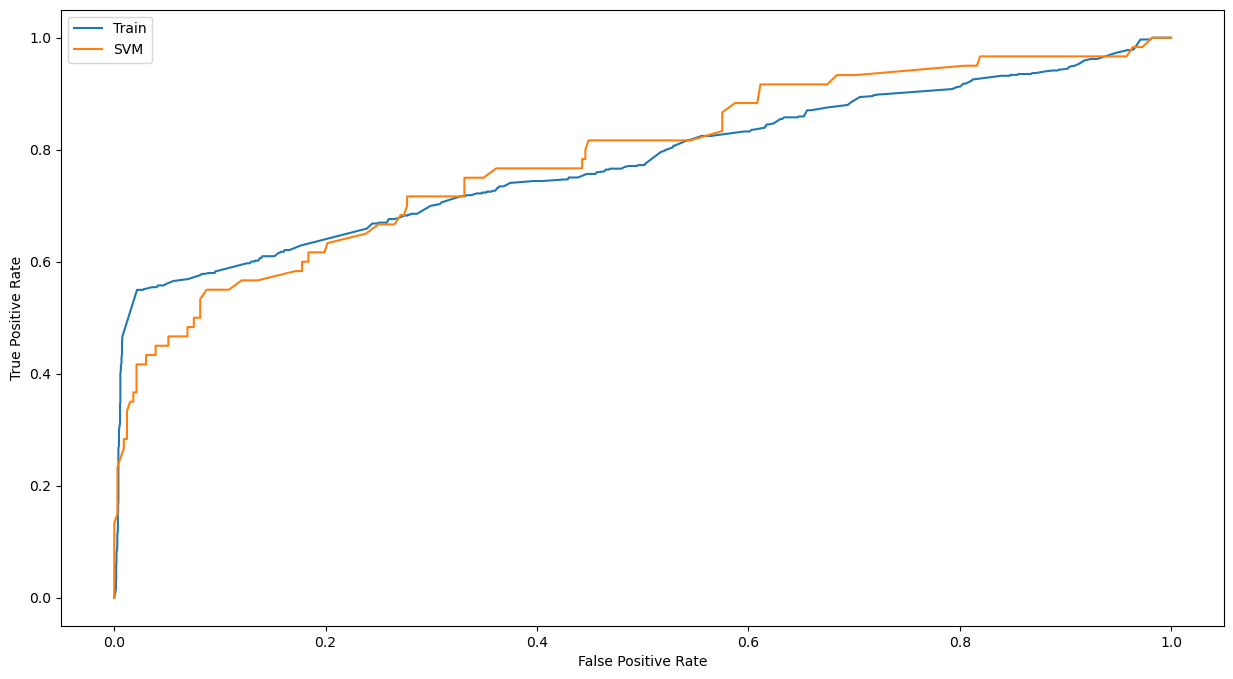

Area Under the Curve for SVM:  0.7858433734939758


In [54]:
prob_pos =model2.decision_function(x_train)
prob_pos = \
(prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())
fpr_t, tpr_t, thresholds = roc_curve(y_train,prob_pos)



# Testing Set
prob_pos =model2.decision_function(x_test)
prob_pos = \
(prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())
fpr_svm, tpr_svm, thresholds = roc_curve(y_test,prob_pos)
roc_auc_svm = auc(fpr_svm, tpr_svm)

plt.figure(figsize=(15,8))
train, = plt.plot(fpr_t, tpr_t, label = 'Train')
test, = plt.plot(fpr_svm, tpr_svm, label = 'SVM')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.savefig("AUC_SVM.png")
plt.show()

print('Area Under the Curve for SVM: ', roc_auc_svm)

#### Gradient boosting

In [56]:

model3.fit(x_train,y_train)
y_pred_gb = model3.predict(x_test)
print(roc_auc_score(y_test,y_pred_gb))
score=cross_val_score(model3, x_train,y_train, cv=10, scoring='roc_auc')
print('Score:',score)
print('AUC',score.mean(),'+',score.std())
#plot_confusion_matrix(confusion_matrix(y_test, y_pred))

0.6773092369477912
Score: [0.7909428  0.75534308 0.78561013 0.75115611 0.76192434 0.82004523
 0.7682977  0.73748956 0.7476817  0.73456558]
AUC 0.7653056230327294 + 0.025328038503563913


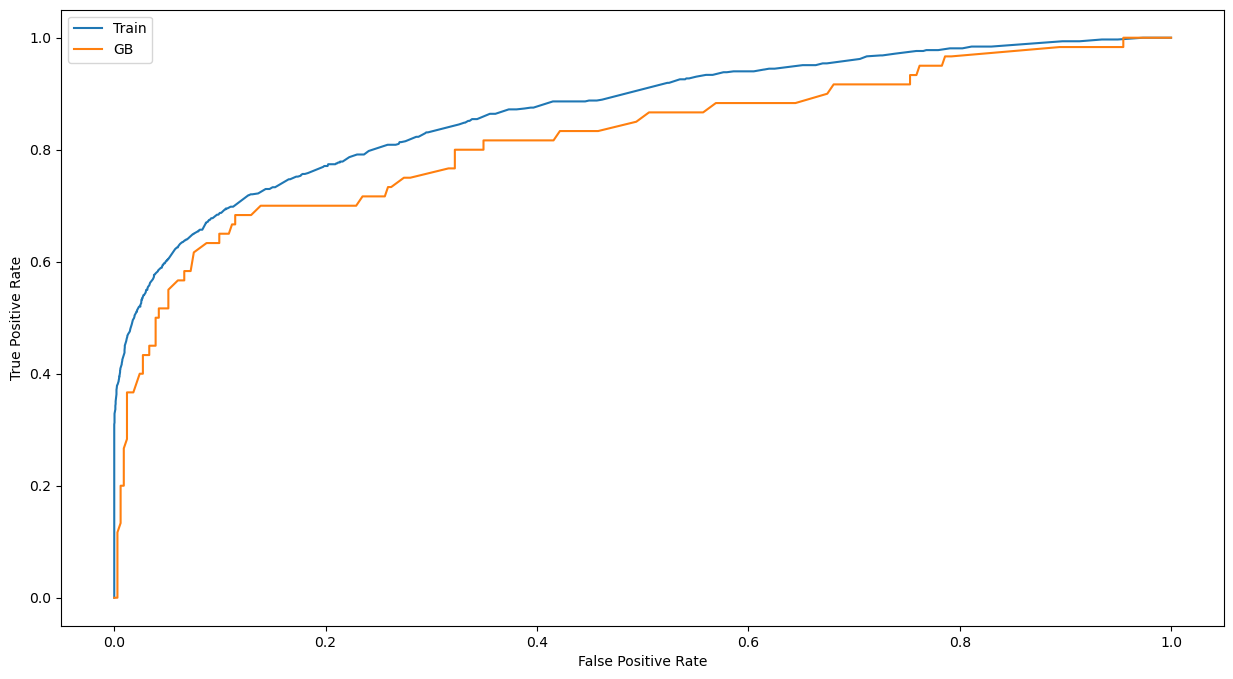

Area Under the Curve for Gradient Boost:  0.8200301204819277


In [57]:
probas_train_gb = model3.predict_proba(x_train)
fpr_t, tpr_t, thresholds_t = roc_curve(y_train, probas_train_gb[:, 1])

# Testing Set
probas_gb = model3.predict_proba(x_test)
fpr_GB, tpr_GB, thresholds = roc_curve(y_test, probas_gb[:, 1])
roc_auc_GB = auc(fpr_GB, tpr_GB)

plt.figure(figsize=(15,8))
train, = plt.plot(fpr_t, tpr_t, label = 'Train')
test, = plt.plot(fpr_GB, tpr_GB, label = 'GB')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.savefig("AUC_GB.png")
plt.show()

print('Area Under the Curve for Gradient Boost: ', roc_auc_GB)

# put all models together

In [58]:
clfs = {
'LogisticRegression' : LogisticRegression(),
'Gradient Boosting' : GradientBoostingClassifier(),
#'GaussianNB': GaussianNB(),
'RandomForest': RandomForestClassifier(n_estimators=150),
#'DecisionTreeClassifier': DecisionTreeClassifier(),
'SVM': SVC(probability=True),
#'KNeighborsClassifier': KNeighborsClassifier(),
#'XGBClassifier': XGBClassifier()
}

In [59]:
# Performance metrics

columns = ['Model', 'Precision_score', 'Recall_score', 'F1_score', 'Accuracy']
models_report = pd.DataFrame(columns=columns)

for clf, clf_name in zip(clfs.values(), clfs.keys()):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    y_pred1 = clf.predict_proba(x_test)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred1[:, 1])
    
    t = pd.Series({
        'Model': clf_name,
        'Precision_score': round(metrics.precision_score(y_test, y_pred, average='weighted'),3),
        'Recall_score': round(metrics.recall_score(y_test, y_pred, average='weighted'),3),
        'F1_score': round(metrics.f1_score(y_test, y_pred, average='weighted'),3),
        #'Log Loss': metrics.log_loss(y_test, y_pred1),
        'Accuracy': round(metrics.accuracy_score(y_test, y_pred),3)
    }
    
    )
    
    models_report = round(pd.concat([models_report, t.to_frame().transpose()] , ignore_index=True),3)

models_report.to_excel('Results.xlsx')

models_report

,Model,Precision_score,Recall_score,F1_score,Accuracy
0,LogisticRegression,0.87,0.88,0.857,0.88
1,Gradient Boosting,0.859,0.872,0.844,0.872
2,RandomForest,0.877,0.888,0.873,0.888
3,SVM,0.862,0.87,0.835,0.87


## Combined AUC

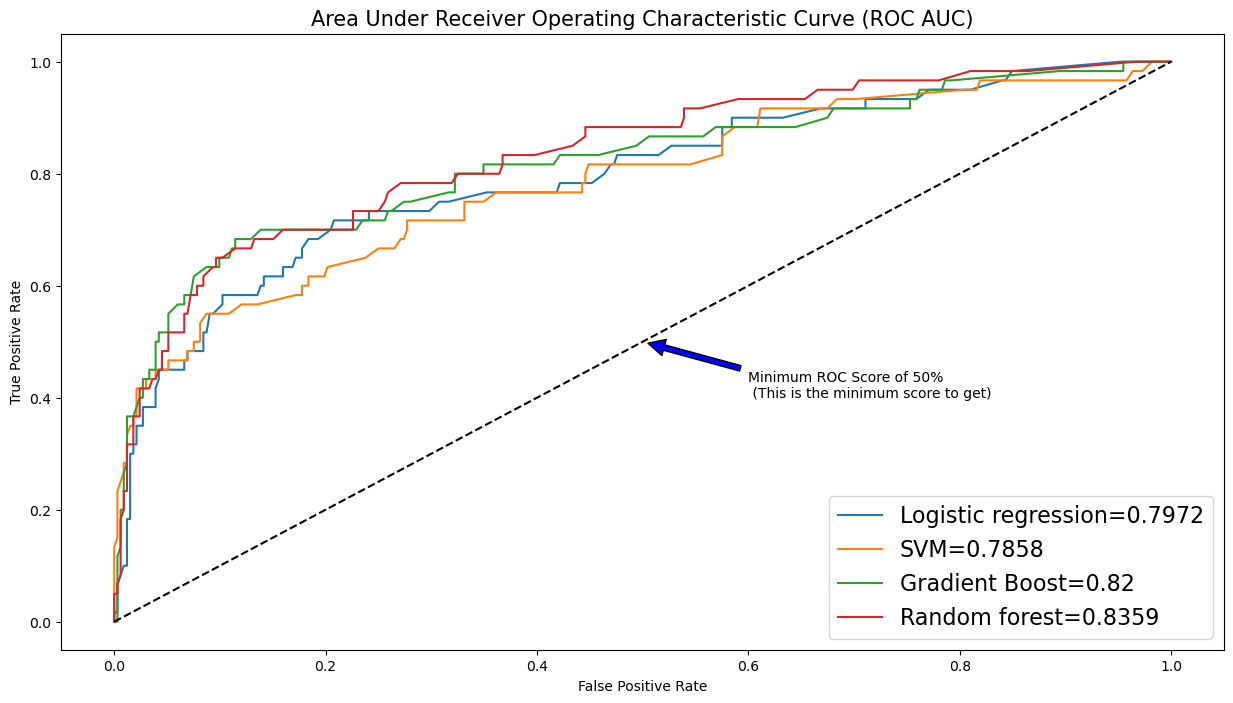

In [60]:
plt.figure(figsize=(15,8))
test, = plt.plot(fpr_lg, tpr_lg, label = 'Logistic regression='+str(round(roc_auc_lg,4)))
#test, = plt.plot(fpr_knn, tpr_knn, label = 'KNeighbors='+str(round(roc_auc_lg,4)))
test, = plt.plot(fpr_svm, tpr_svm, label = 'SVM='+str(round(roc_auc_svm,4)))
test, = plt.plot(fpr_GB, tpr_GB, label = 'Gradient Boost='+str(round(roc_auc_GB,4)))
#test, = plt.plot(fpr_DT, tpr_DT, label = 'Decision Tree='+str(round(roc_auc_DT,4)))
test, = plt.plot(fpr_rf, tpr_rf, label = 'Random forest='+str(round(roc_auc_rf,4)))
#test, = plt.plot(fpr_XGB, tpr_XGB, label = 'XGBOOST='+str(round(roc_auc_XGB,4)))
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Receiver Operating Characteristic Curve (ROC AUC)',fontsize=15)
plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.4),
                arrowprops=dict(facecolor='b', shrink=0.05),
                )
plt.legend(fontsize=16)
plt.savefig("AUC_All.png")
plt.show()

In [61]:
x_train.columns

Index(['Sex_0', 'Sex_1', 'marital status_0', 'marital status_1',
       'marital status_2', 'employment_0', 'employment_1', 'education_0',
       'education_1', 'education_2', 'religion_0', 'religion_1', 'religion_2',
       'affiliation pro-social group_0', 'affiliation pro-social group_1',
       'Mental health history_0', 'Mental health history_1',
       'Medical condition experience_0', 'Medical condition experience_1',
       'heavy drinking_0', 'heavy drinking_1', 'violence experience_0',
       'violence experience_1', 'trauma experience_0', 'trauma experience_1',
       'lifetime loss_0', 'lifetime loss_1', 'family history mental illness_0',
       'family history mental illness_1', 'age_group_0', 'age_group_1'],
      dtype='object')

## Features importance

In [62]:
dictm={ 0:'Sex_Female', 1:'Sex_Male', 3:'marital status_Separated/Divorced', 4:'marital status_Married',
       5:'marital status_Never married', 6:'employment_Employed', 7:'employment_Unemployed', 8:'education_No education',
       9:'education_Primary', 10:'education_Secondary/higher', 11:'religion_Christian', 12:'religion_Muslim', 13:'religion_Other/None',
       14:'affiliation pro-social group_No', 15:'affiliation pro-social group_Yes',
       16:'Mental health history_No', 17:'Mental health history_Yes',
       18:'Medical condition experience_No', 19:'Medical condition experience_Yes',
       20:'heavy drinking_No', 21:'heavy drinking_Yes', 22:'violence experience_No',
       23:'violence experience_Yes', 24:'trauma experience_No', 25:'trauma experience_Yes',
       26:'lifetime loss_No', 27:'lifetime loss_Yes',
       28:'family history mental illness_No', 29:'family history mental illness_Yes',
       30:'age_group_Adolescent', 31:'age_group_Young adults'}

x_train.columns=dictm.values()

In [63]:
importance = pd.DataFrame({'feature':x_train.columns,'importance':np.round(model1.feature_importances_,3)})
importance= importance.sort_values('importance',ascending=True).set_index('feature')

In [64]:
importance.to_excel('feature_values.xlsx')
importance

,importance
feature,
religion_Muslim,0.008
marital status_Never married,0.011
Medical condition experience_Yes,0.013
Medical condition experience_No,0.014
religion_Other/None,0.017
employment_Unemployed,0.018
religion_Christian,0.019
employment_Employed,0.020
Mental health history_Yes,0.023


## plot feature importance

<Figure size 1500x1000 with 0 Axes>

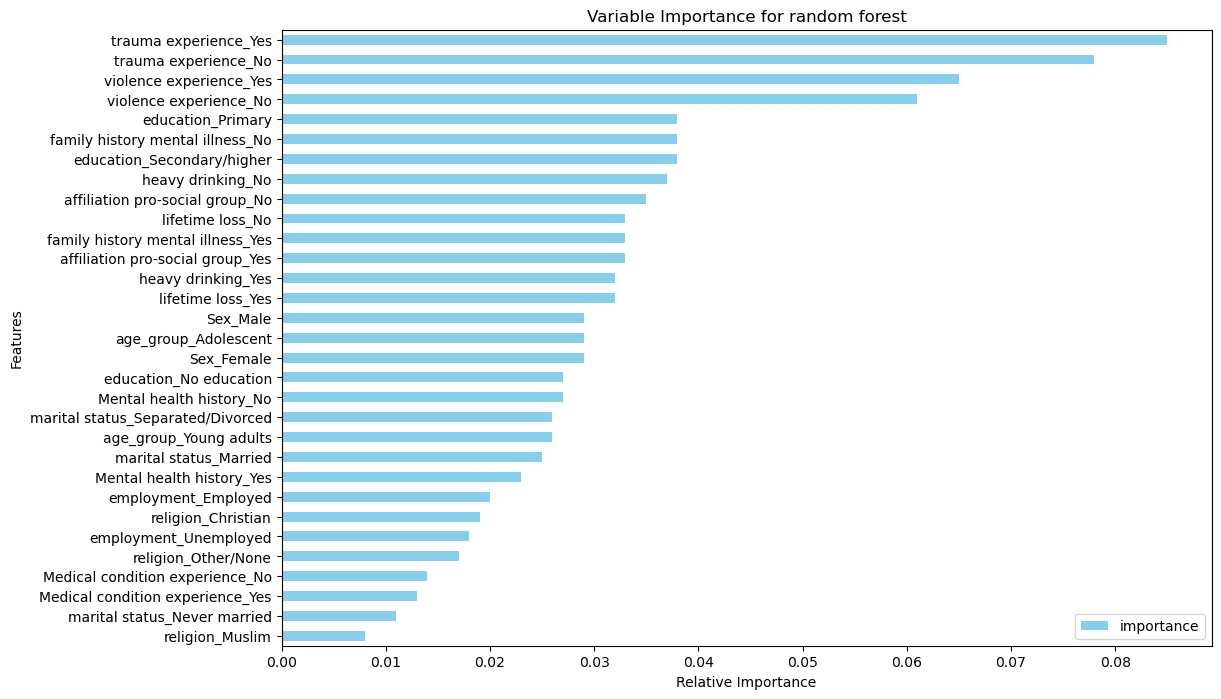

In [69]:

plt.figure(figsize=(15, 10))
importance.plot.barh(align='center', color='skyblue')  # Adjust color if needed

#plt.bar(importances,align='center', color='skyblue', rotation = 45)

plt.xlabel('Relative Importance')
plt.ylabel('Features')
plt.title('Variable Importance for random forest', fontsize=12)

plt.savefig("features_importances.jpg")
plt.show()

## Evaluate the contributions of the feature

In [66]:
feature_importance  = model1.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())

## Plot the contributions

In [67]:

from sklearn.preprocessing import scale
import json

def class_feature_importance(x_test, y_test,feature_importance ):
    N, M = x_test.shape
    x_test = scale(x_test)

    out ={}
    for c in set(y_test):
        out[c] =dict (
          zip(range(M), np.mean(x_test[y_test==c, :], axis=0)*feature_importance)
        )

    return out

result = class_feature_importance(x_test, y_test, feature_importance)
#result=result.astype(np.int32)
#print (json.dumps(result,indent=4))

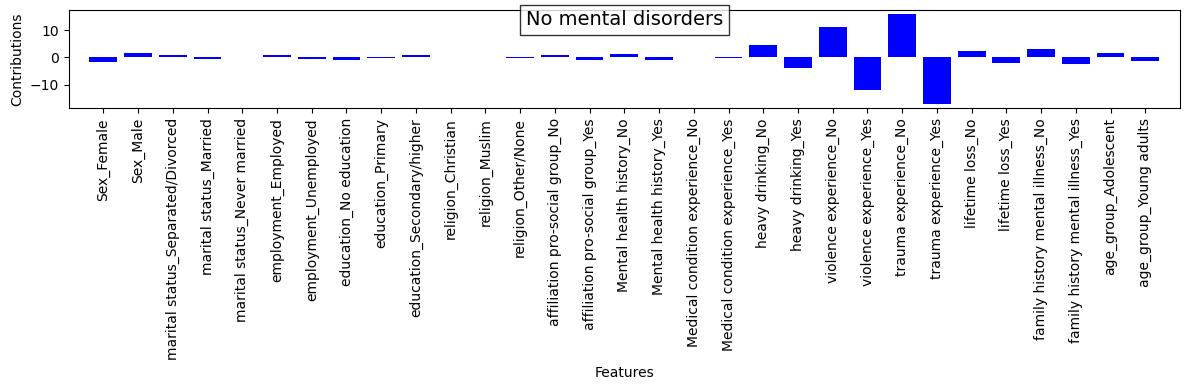

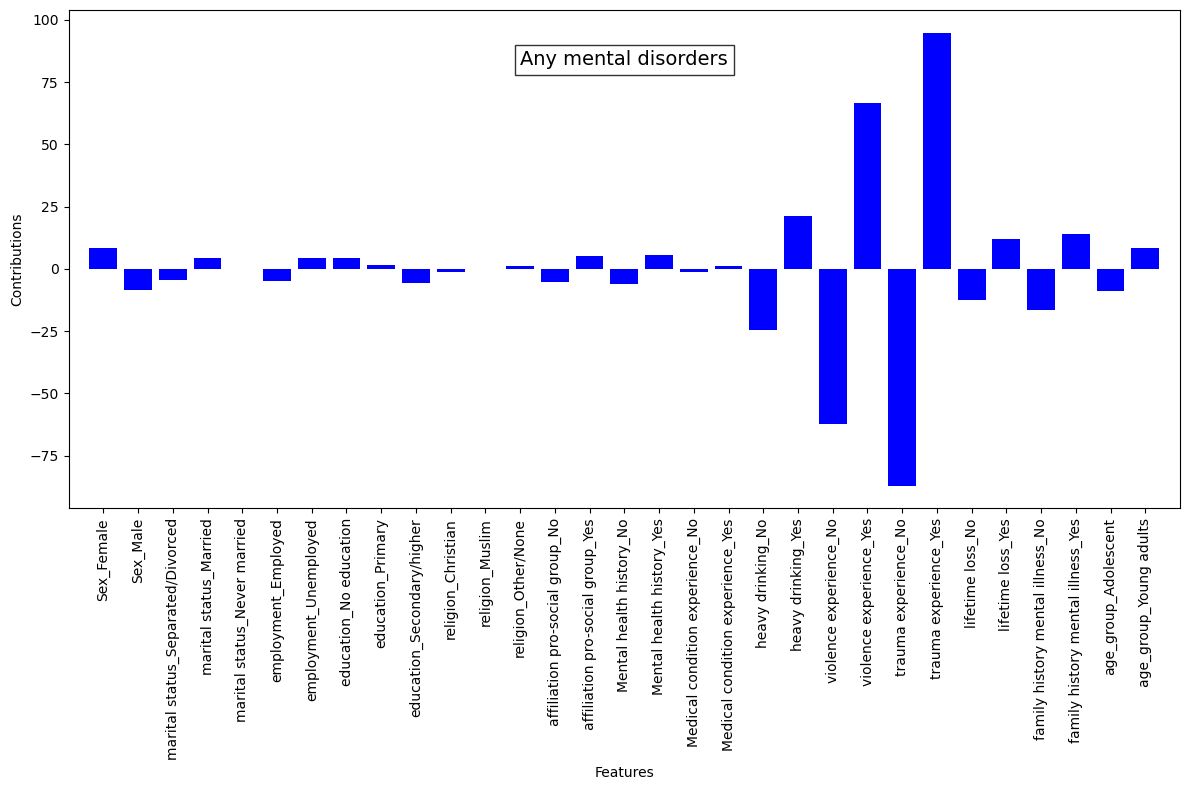

In [68]:
s = ['No mental disorders','Any mental disorders']
for t, i in zip(s, range(len(result))):
    plt.figure()
    plt.rcParams['figure.figsize'] = [12, 8]
    plt.bar(dictm.values(), result[i].values(), color="b", align="center")
    plt.xticks(rotation=90)
    plt.xlim([-1, len(result[i])])
    plt.text(0.5, 0.9, t, ha='center', va='center', transform=plt.gca().transAxes, fontsize=14, bbox=dict(facecolor='white', alpha=0.8))
    plt.xlabel("Features")
    plt.ylabel("Contributions")
    plt.tight_layout()
    plt.savefig(f"features_contributions_{i}.png")
    plt.show()